In [1]:
# !pip install graphrole cdlib

In [4]:
# !pip install networkx

  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)


In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_node = pd.read_csv("C:/Users/UYEN/OneDrive - Trường ĐH CNTT - University of Information Technology/Đại Học/Năm 4/Làm nhóm HK2 2022-2023/Mạng xã hội/FinalProject/RatingCSV.csv")
df_node.head(5)

,user_id,movie_id,rating
0,1,101,5
1,1,102,3
2,1,103,3
3,1,104,3
4,1,105,2


In [10]:
B = nx.Graph()
userList = df_node['user_id']
movieList = df_node['movie_id']

edges_from = []
for index, row in df_node.iterrows():
    edges_from.append((row["user_id"], row["movie_id"]))

print("Number of user: ", userList.nunique())
print("Number of movie: ", movieList.nunique())
print("Number of edge: ", len(edges_from))

Number of user:  7
Number of movie:  6
Number of edge:  32


In [11]:
B.add_nodes_from(userList, bipartite=0)
B.add_nodes_from(movieList, bipartite=1)
B.add_edges_from(edges_from)

<Figure size 1200x1200 with 0 Axes>

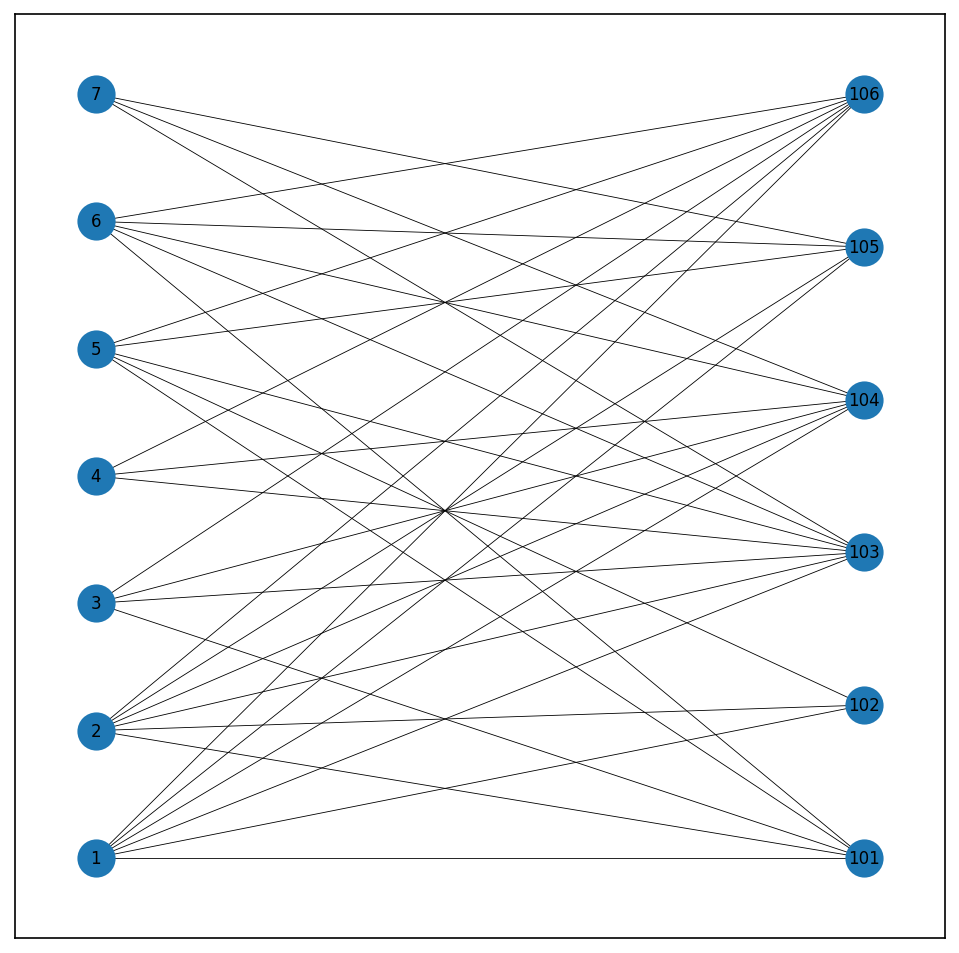

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1,1, figsize=(8,8), dpi=150)
nx.draw_networkx(B, pos = nx.drawing.layout.bipartite_layout(B,userList),font_size=8,width=0.4)

In [13]:
user, movie  = nx.bipartite.sets(B)

In [14]:
P = nx.bipartite.weighted_projected_graph(B, user, ratio=False)

In [15]:
for edge in P.edges(data=True):
    print(edge)

(1, 2, {'weight': 6})
(1, 3, {'weight': 4})
(1, 4, {'weight': 3})
(1, 5, {'weight': 5})
(1, 6, {'weight': 5})
(1, 7, {'weight': 3})
(2, 3, {'weight': 4})
(2, 4, {'weight': 3})
(2, 5, {'weight': 5})
(2, 6, {'weight': 5})
(2, 7, {'weight': 3})
(3, 4, {'weight': 3})
(3, 5, {'weight': 3})
(3, 6, {'weight': 4})
(3, 7, {'weight': 2})
(4, 5, {'weight': 2})
(4, 6, {'weight': 3})
(4, 7, {'weight': 2})
(5, 6, {'weight': 4})
(5, 7, {'weight': 2})
(6, 7, {'weight': 3})


# Louvain

In [19]:
# !pip install community

C:\Users\UYEN\AppData\Local\Temp\ipykernel_3900\1521244298.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap( 'viridis', max(partition. values()) + 1)


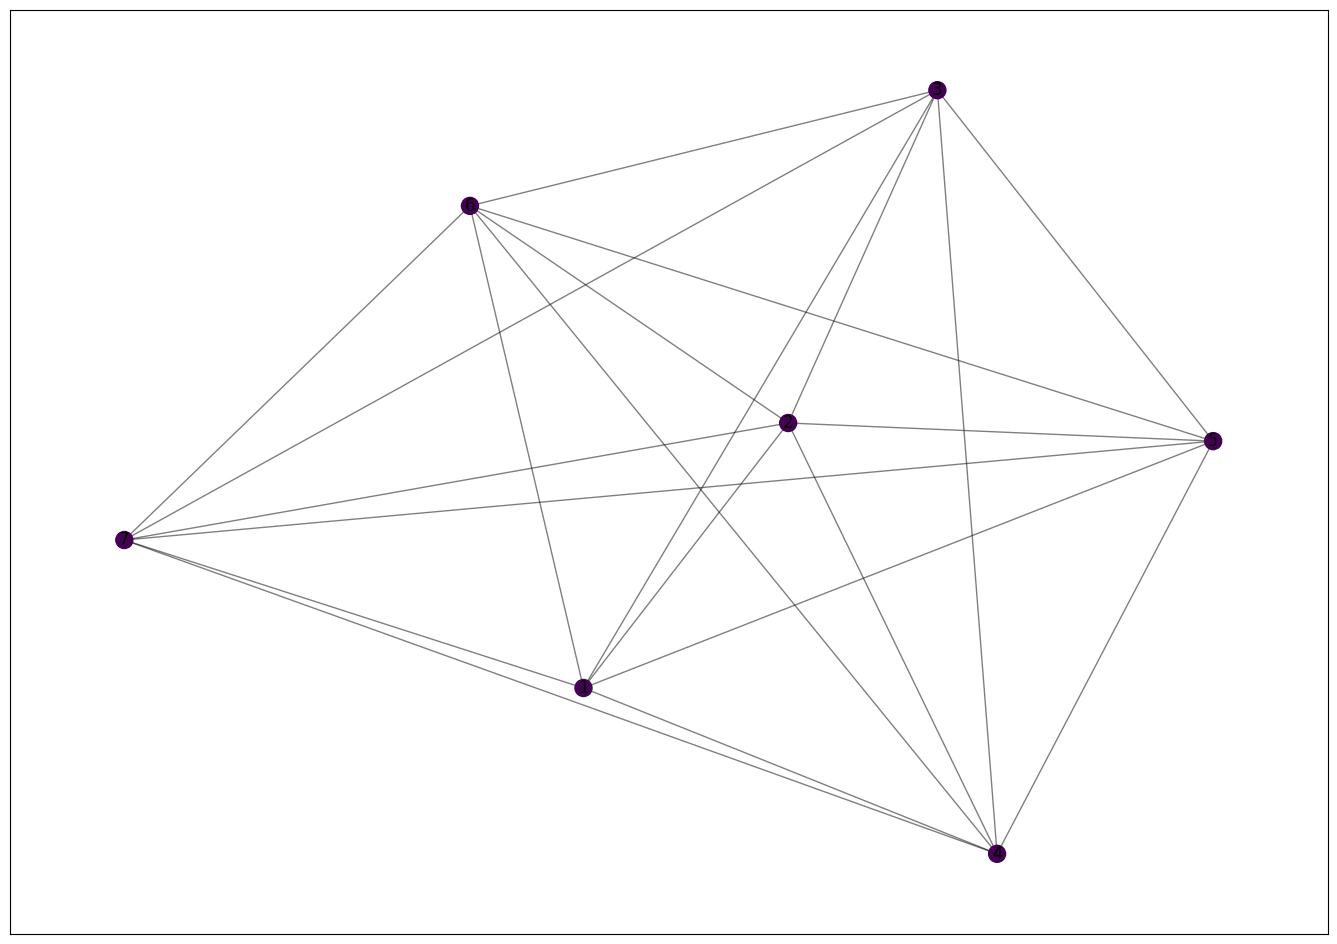

In [20]:
import community.community_louvain as community_louvain
from matplotlib import cm
plt.figure(figsize=(17, 12))

# compute the best partition
partition = community_louvain.best_partition(P)

# draw the graph
pos = nx.spring_layout(P)

# color the nodes according to their partition
cmap = cm.get_cmap( 'viridis', max(partition. values()) + 1)
nx.draw_networkx_nodes(P, pos, partition. keys(), node_size=150, cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges (P, pos, alpha=0.5)
nx.draw_networkx_labels (P, pos)

plt.show()